In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


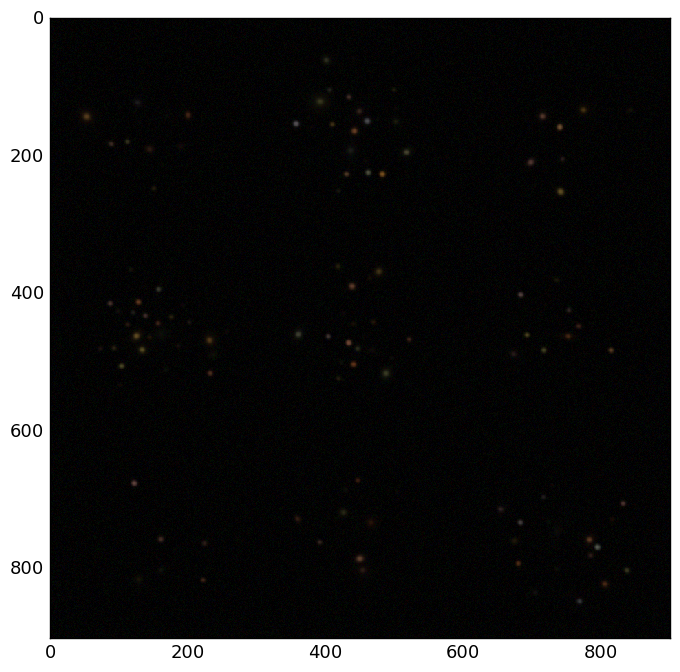

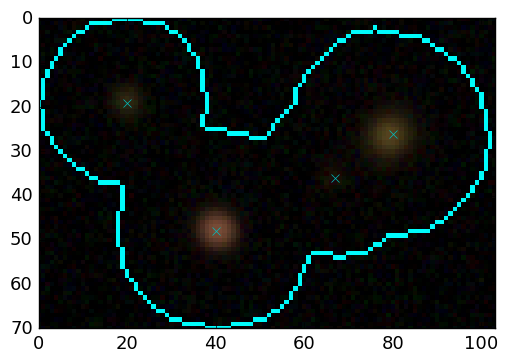

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

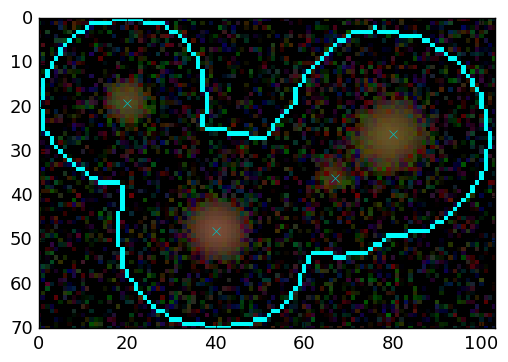

INFO:lsst.meas.deblender.proximal:constraints: M
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:0 1.49262602623 49 113.271894359 49 [1, 1, 1, 1]
INFO:lsst.meas.deblender.proximal_nmf:1 0.00198989946752 49 114.164622812 49 [58, 158, 150, 111]
INFO:lsst.meas.deblender.proximal_nmf:2 0.00146015033049 49 114.118854858 49 [50, 16, 23, 96]
INFO:lsst.meas.deblender.proximal_nmf:3 0.00138431888447 49 113.962653761 49 [48, 16, 22, 96]
INFO:lsst.meas.deblender.proximal_nmf:4 0.00134057363404 49 113.833103624 49 [48, 16, 18, 96]
INFO:lsst.meas.deblender.proximal_nmf:5 0.00131244596895 49 113.735316987 49 [48, 16, 18, 96]
INFO:lsst.meas.deblender.proximal_nmf:6 0.00129417150597 49 113.661034431 49 [48, 16, 18, 96]
IN

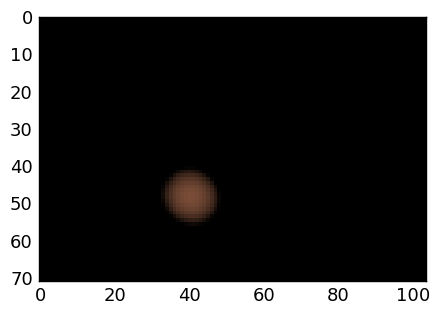

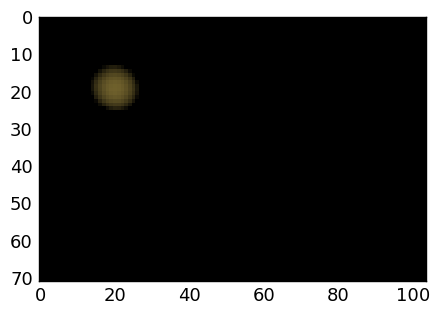

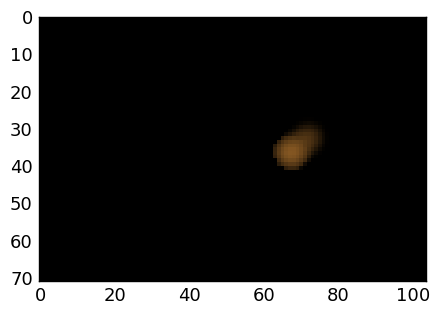

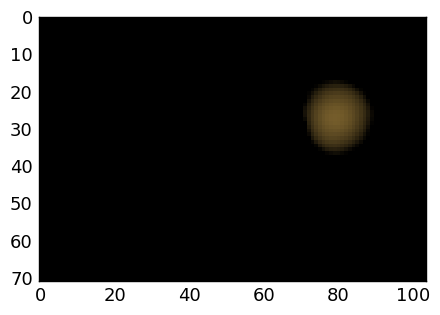

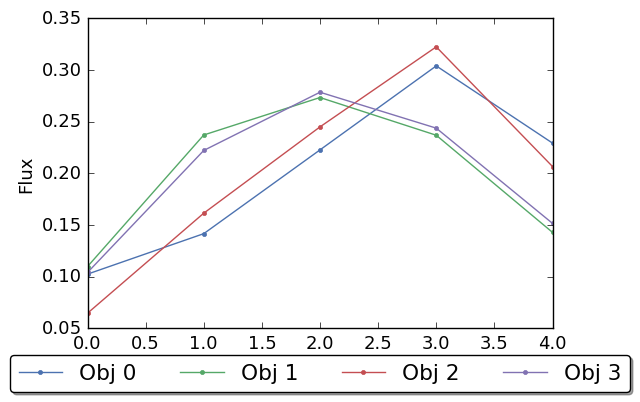

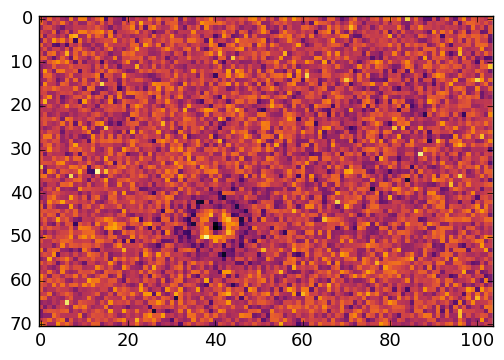

CPU times: user 29.1 s, sys: 376 ms, total: 29.5 s
Wall time: 29.3 s


In [3]:
%time deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=50, constraints='M', l0_thresh=.005, usePsf=True, psfThresh=3e-3, nonSymmetricFill=0)

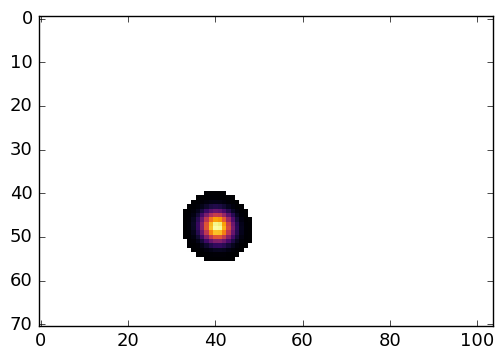

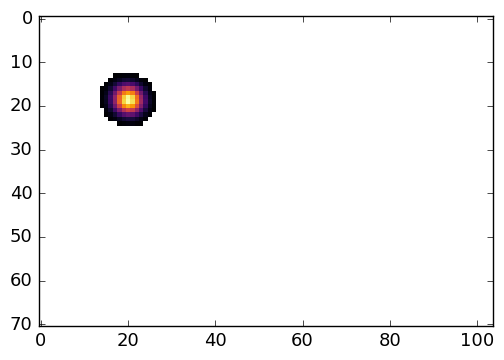

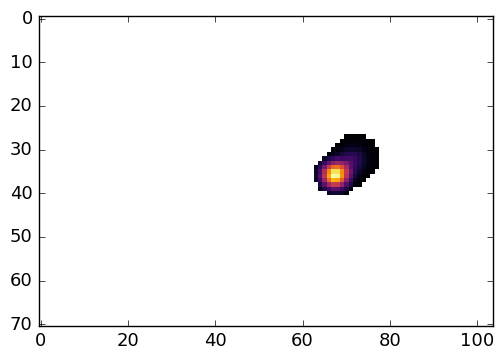

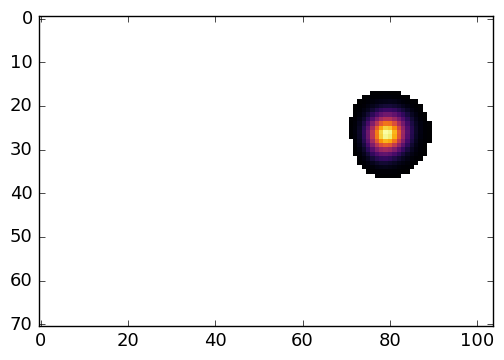

In [4]:
deblend.displayAllImages(0)

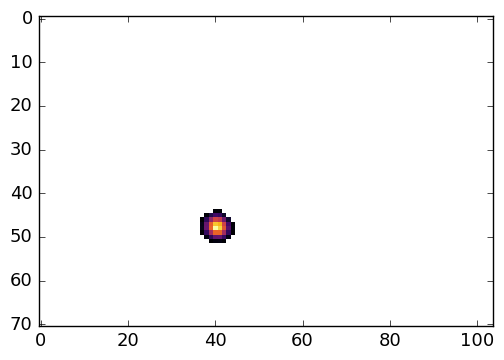

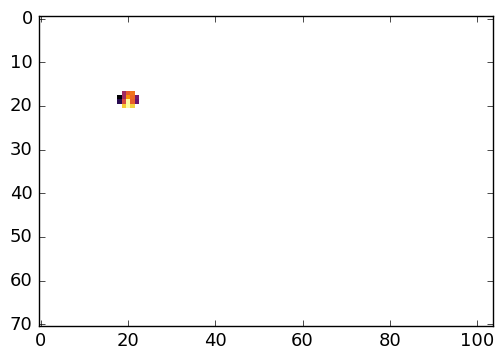

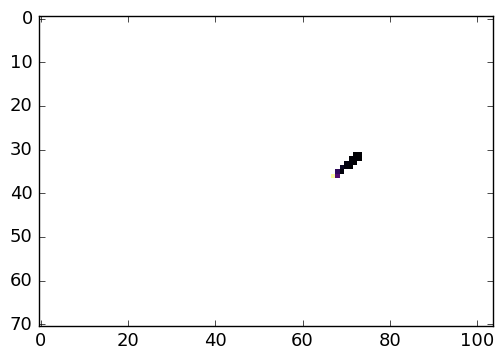

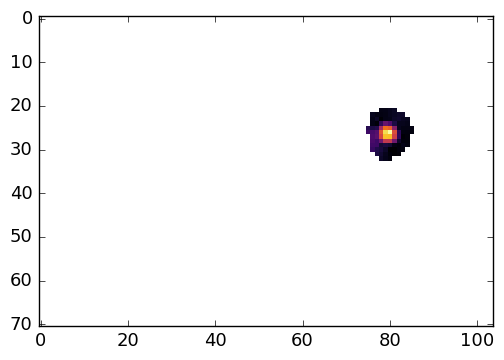

In [5]:
deblend.displayAllImages(imgType='intensity')

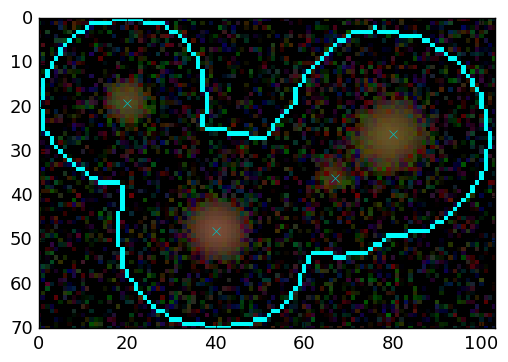

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:0 1.49262602623 199 113.258791041 199 [1, 1, 1, 1]
INFO:lsst.meas.deblender.proximal_nmf:1 0.00107006976018 192 113.41675725 199 [69, 21, 19, 109]
INFO:lsst.meas.deblender.proximal_nmf:2 0.00134923685347 161 113.388783281 199 [49, 21, 19, 109]
INFO:lsst.meas.deblender.proximal_nmf:3 0.00132990269535 138 113.384086824 199 [49, 21, 19, 109]
INFO:lsst.meas.deblender.proximal_nmf:4 0.00131467388816 1 113.3840669 199 [49, 21, 19, 109]
INFO:lsst.meas.deblender.proximal_nmf:5 0.00129852526063 53 113.383887785 199 [49, 21, 19, 109]
INFO:lsst.meas.deblender.proximal_nmf:6 0.00128421376363 0 113.383880202 199 [49, 21, 1

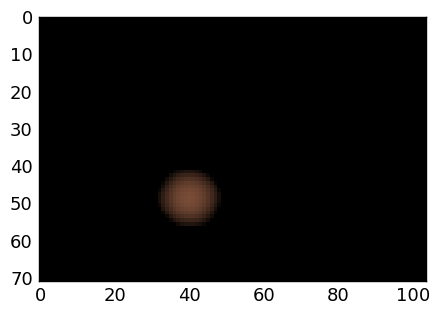

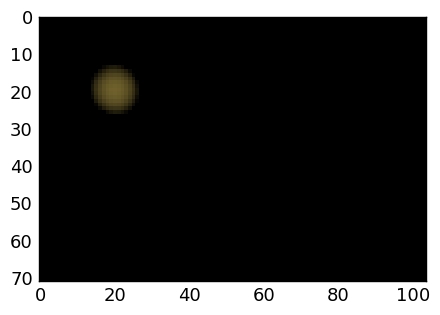

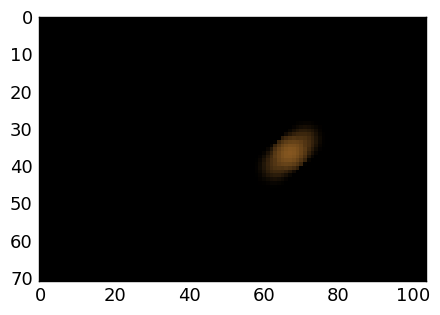

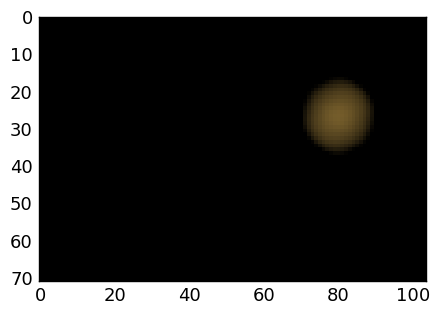

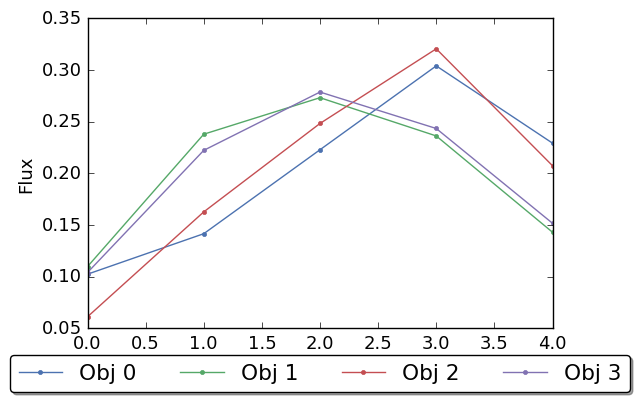

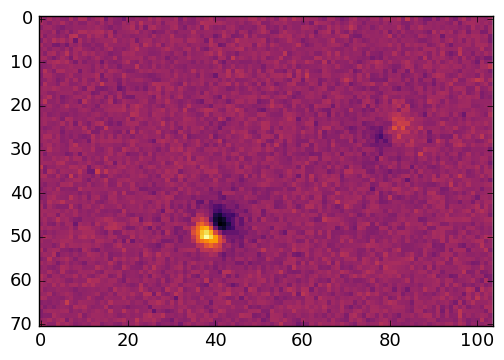

CPU times: user 1min 11s, sys: 1.96 s, total: 1min 13s
Wall time: 1min 12s


In [8]:
%time sdmm = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=200, constraints='MS', nonSymmetricFill=0, algorithm="SDMM", l0_thresh=.005, usePsf=True, psfThresh=3e-3)

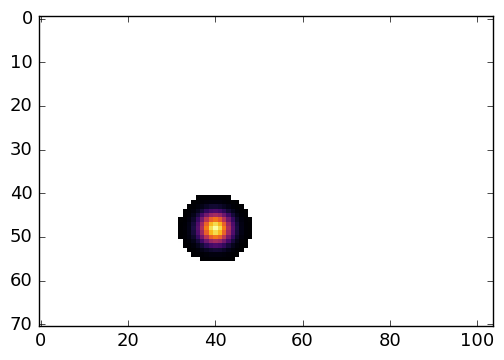

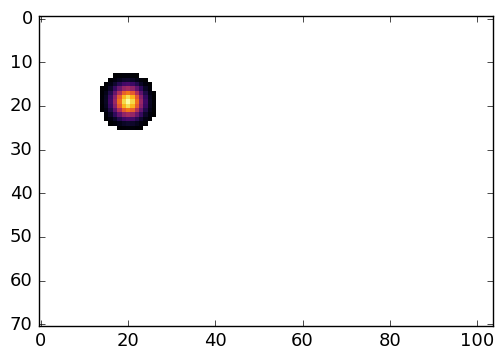

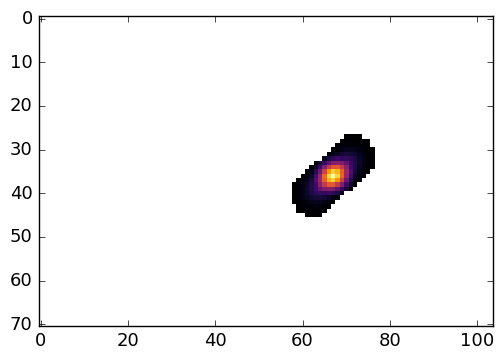

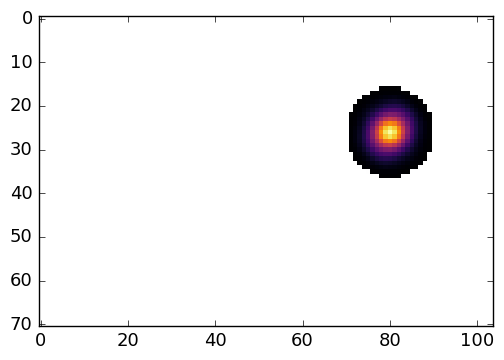

In [9]:
sdmm.displayAllImages(0)